In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib notebook

In [3]:
df = pd.read_csv('Car Prediction.csv')
df.drop('Car_Name', axis=1, inplace=True)

In [104]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [5]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
current_year = 2020
df['Age'] = current_year - df['Year']
df.drop('Year', axis=1, inplace=True)

In [9]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [10]:
final = pd.get_dummies(df,drop_first=True)

In [73]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


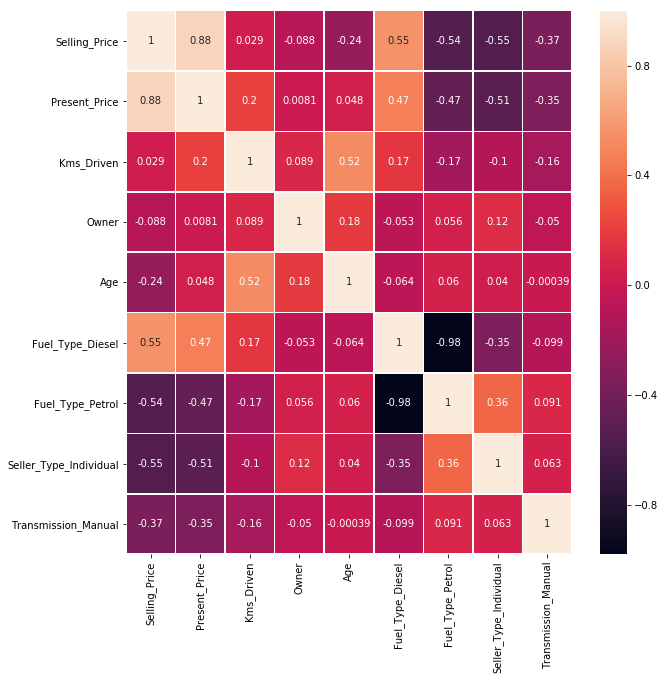

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(final.corr(), linewidths=0.5, annot=True)

In [13]:
X = final.drop('Selling_Price', axis=1)
y = final['Selling_Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1500,num=15)]

max_depth = [int(x) for x in np.linspace(5,50,10)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

max_features = ['auto', 'sqrt']

In [16]:
random = {'n_estimators': n_estimators,
         'max_depth': max_depth,
         'min_samples_split': min_samples_split,
         'min_samples_leaf': min_samples_leaf,
         'max_features': max_features}

In [113]:
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=random, scoring='neg_mean_squared_error', n_iter=10, cv=5)

In [114]:
rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [115]:
predict = rf_cv.predict(X_test)
X_test.iloc[0]

Present_Price                35.96
Kms_Driven                41000.00
Owner                         0.00
Age                           6.00
Fuel_Type_Diesel              1.00
Fuel_Type_Petrol              0.00
Seller_Type_Individual        0.00
Transmission_Manual           0.00
Name: 59, dtype: float64

In [118]:
test = np.array([[7.60,77632,0,6,1,0,0,1]])
rf_cv.predict([[35.96,41000,0,6,1,0,0,0]])

array([21.66846531])

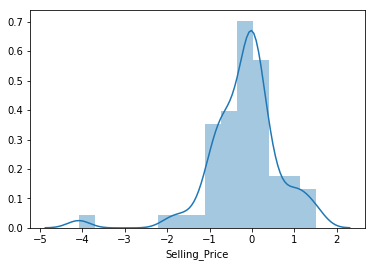

In [110]:
sns.distplot(y_test-predict)

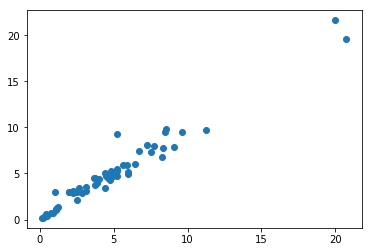

In [111]:
plt.scatter(y_test,predict)

In [112]:
#file = open('car_prediction_model.pkl','wb')
#pickle.dump(rf_cv,file)